In [3]:
# Load the Iris dataset from the uploaded CSV file
import pandas as pd

# Read dataset
iris_df = pd.read_csv("C:\\Users\\arjav\\Downloads\\archive (1)\\Iris.csv")

# Show the first 5 rows
iris_df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Step 1: Data Cleaning & Preprocessing

# Drop the 'Id' column (not useful for ML)
iris_df.drop('Id', axis=1, inplace=True)

# Check for null values
nulls = iris_df.isnull().sum()

# Check data types
dtypes = iris_df.dtypes

# Check class balance (how many samples per species)
class_counts = iris_df['Species'].value_counts()

nulls, dtypes, class_counts


(SepalLengthCm    0
 SepalWidthCm     0
 PetalLengthCm    0
 PetalWidthCm     0
 Species          0
 dtype: int64,
 SepalLengthCm    float64
 SepalWidthCm     float64
 PetalLengthCm    float64
 PetalWidthCm     float64
 Species           object
 dtype: object,
 Species
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 Name: count, dtype: int64)

<Figure size 1000x600 with 0 Axes>

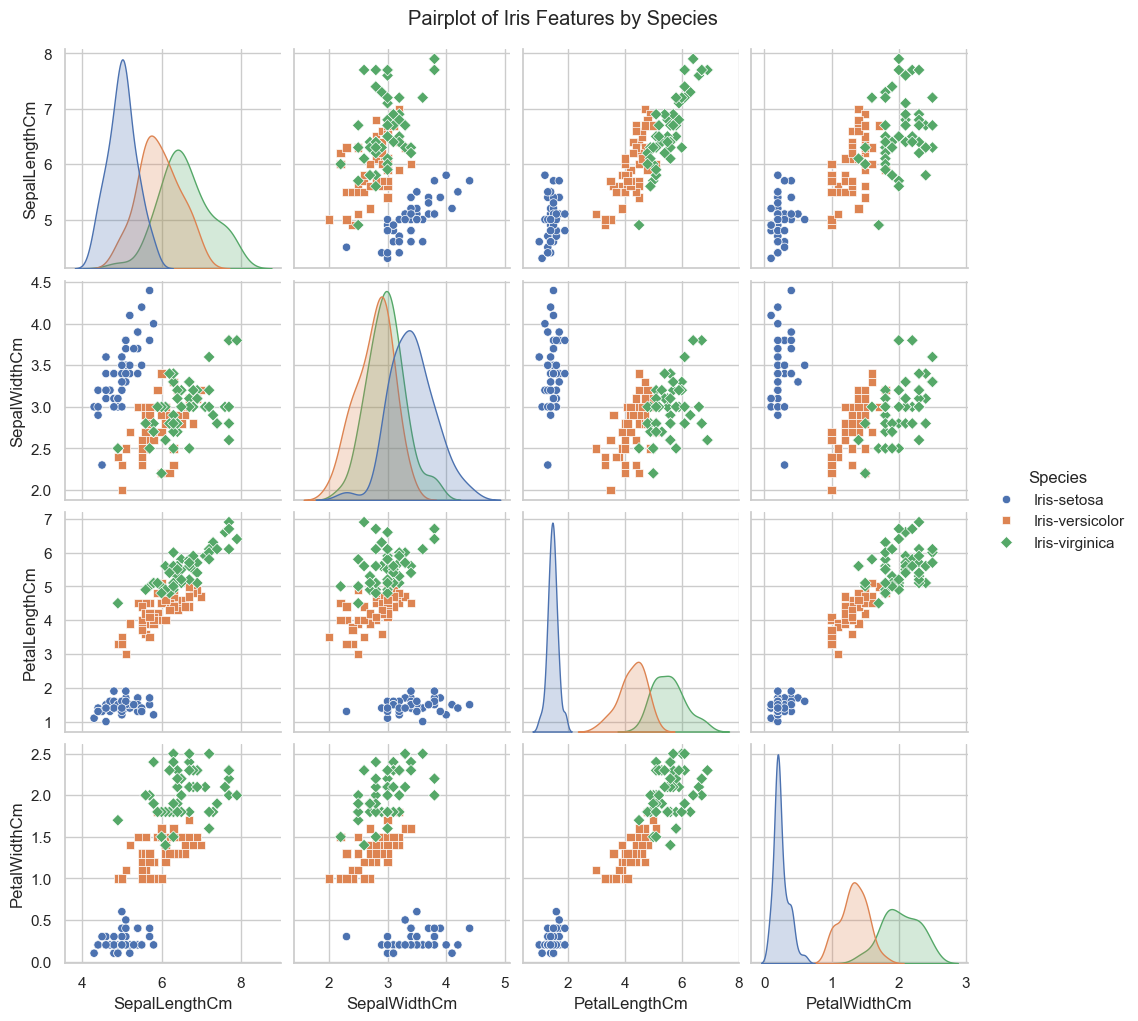

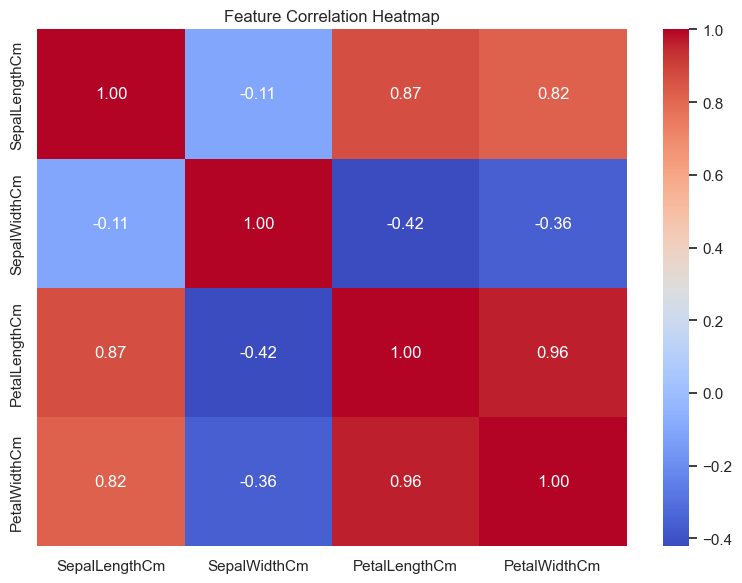

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Pairplot for all features
plt.figure(figsize=(10, 6))
pair_plot = sns.pairplot(iris_df, hue="Species", diag_kind="kde", markers=["o", "s", "D"])
pair_plot.fig.suptitle("Pairplot of Iris Features by Species", y=1.02)

# Correlation heatmap
plt.figure(figsize=(8, 6))
corr = iris_df.drop("Species", axis=1).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()

plt.show()


<Figure size 1000x600 with 0 Axes>

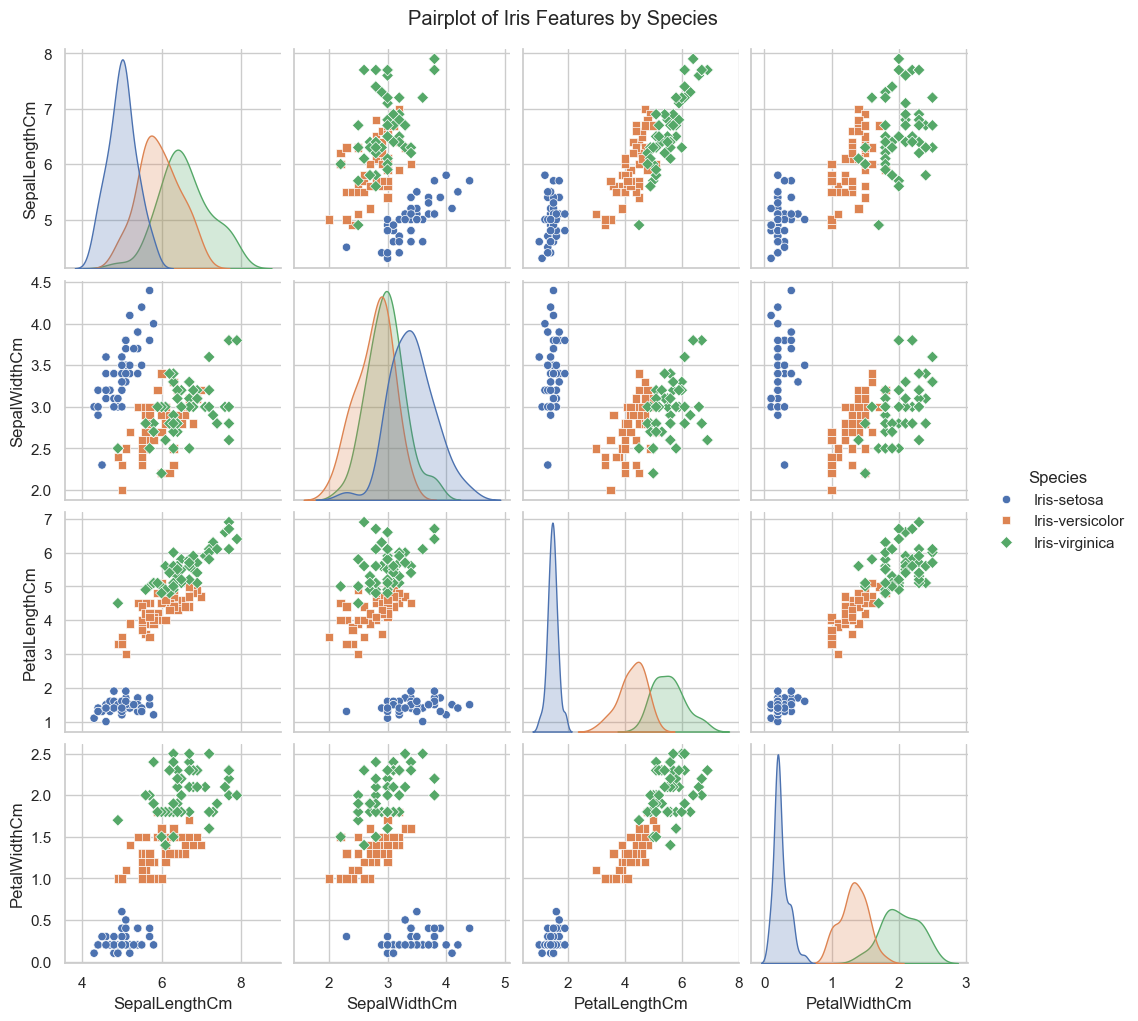

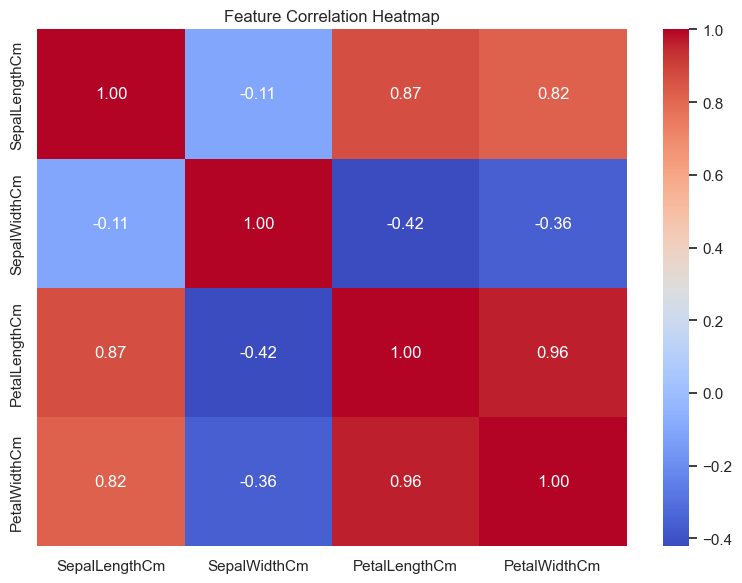

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Pairplot of all features grouped by species
plt.figure(figsize=(10, 6))
pair_plot = sns.pairplot(iris_df, hue="Species", diag_kind="kde", markers=["o", "s", "D"])
pair_plot.fig.suptitle("Pairplot of Iris Features by Species", y=1.02)

# Correlation heatmap
plt.figure(figsize=(8, 6))
corr = iris_df.drop("Species", axis=1).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Encode the target variable (Species)
le = LabelEncoder()
iris_df['Species'] = le.fit_transform(iris_df['Species'])

# Split features and labels
X = iris_df.drop("Species", axis=1)
y = iris_df["Species"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n📌 {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



📌 Logistic Regression
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


📌 K-Nearest Neighbors
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


📌 S

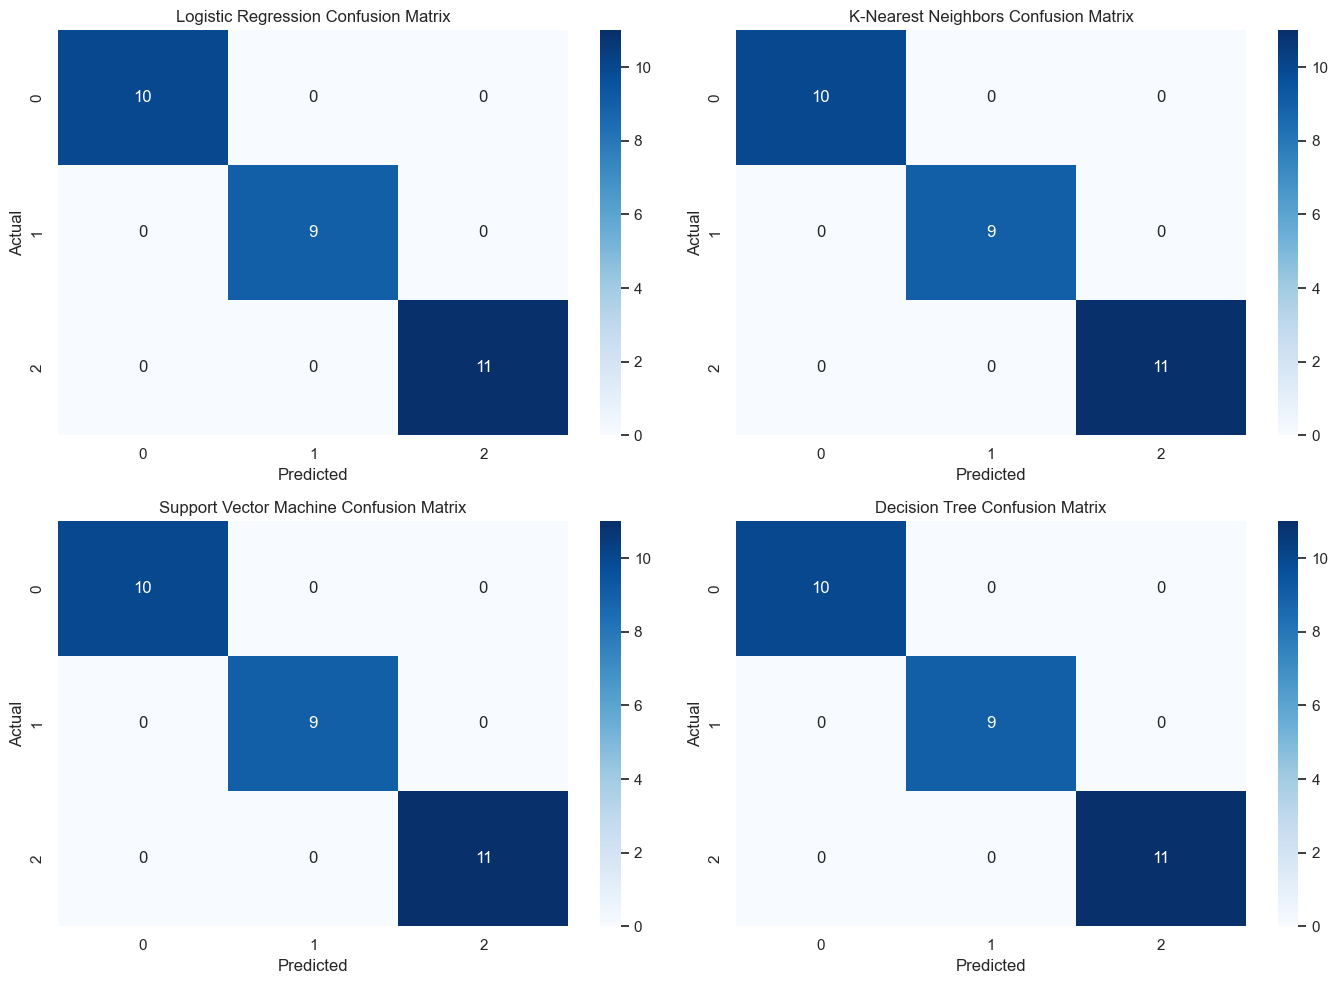

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Confusion matrix visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()
